<a href="https://colab.research.google.com/github/elliot-linsey/QMUL/blob/main/Data%20Mining/Coursework%204%20pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

# ECS766 Coursework 4 - Elliot Linsey

## Q1.A

* \<!DOCTYPE html\>, this tag declares to the browser what type of information to expect. All html documents must start with this tag. 
* \<html\>, this tag represents the root of the html document and is the tag in which all of the information within the document is contained (apart from the \<!DOCTYPE html\> tag). 
* \<body\>, this tag defines where the contents such as headings, paragraphs, tables, images and anything else that the user will actually see or interact with are placed within the document. There can be only one body within an html document but it can be split into sections with div elements. 
* \<h1\>, this tag is used to define the heading of the html document and is usually used as the main title. This is because it is the largest heading available in comparison to lesser headings like h2, h3 and so on. 
* \<p\>, this tag defines a paragraph element which is a block of text. If the \<h\> tag is the title, then the \<p\> tag will usually be the paragraph below it.
* \<table\>, this tag defines a table, it must contain one of more of the \<tr\>, \<td\> and \<th\> elements.
* \<thead\>, this defines the head of the table which is where the column headings will be located. 
* \<tbody\>, this defines the body of the table where the data will be located. 
* \<tr\>, this indicates a table row which can contain either data \<td\> or headings \<th\> in this instance. 
* \<th\>, this indicates a table heading which will contain the column headings, usually a child of \<tr\>.
* \<td\>, this indicates table data that will be placed within a row, usually a child of \<tr\> also. 

## Q1.B

In [39]:
url = 'http://eecs.qmul.ac.uk/~emmanouilb/income_table.html'
html = urlopen(url)

In [40]:
soup = BeautifulSoup(html, 'lxml')

In [41]:
th = soup.find_all('th')
headers = []
for header in th:
  headers.append(header.get_text())
headers

['Region', 'Age', 'Income', 'Online Shopper']

In [42]:
td = soup.find_all('td')
rows = []
for row in td:
  rows.append(row.get_text())
rows = np.array(rows)
rows = np.reshape(rows,(10,4))
rows

array([['India', '49', '86400', 'No'],
       ['Brazil', '32', '57600', 'Yes'],
       ['USA', '35', '64800', 'No'],
       ['Brazil', '43', '73200', 'No'],
       ['USA', '45', '', 'Yes'],
       ['India', '40', '69600', 'Yes'],
       ['Brazil', '', '62400', 'No'],
       ['India', '53', '94800', 'Yes'],
       ['USA', '55', '99600', 'No'],
       ['India', '42', '80400', 'Yes']], dtype='<U6')

In [43]:
df = pd.DataFrame(rows,columns=headers)
df

,Region,Age,Income,Online Shopper
0,India,49,86400,No
1,Brazil,32,57600,Yes
2,USA,35,64800,No
3,Brazil,43,73200,No
4,USA,45,,Yes
5,India,40,69600,Yes
6,Brazil,,62400,No
7,India,53,94800,Yes
8,USA,55,99600,No
9,India,42,80400,Yes


## Q2

In [44]:
url = 'http://eecs.qmul.ac.uk/postgraduate/programmes/'
html = urlopen(url)

In [45]:
soup = BeautifulSoup(html, 'lxml')

In [46]:
th = soup.find_all('th')
headers = []
for header in th:
  headers.append(header.get_text())
headers

['Postgraduate degree programmes', 'Part-time(2 year)', 'Full-time(1 year)']

In [47]:
td = soup.find_all('td')
rows = []
for row in td:
  rows.append(row.get_text())
rows = np.array(rows)
rows = np.reshape(rows,(14,3))
rows2 = []
for x in rows:
  rows2.append(np.char.strip(x,'\xa0'))
rows = rows2
#rows

In [48]:
df2 = pd.DataFrame(rows, columns=headers)
df2

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)
0,Advanced Electronic and Electrical Engineering,H60C,H60A
1,Artificial Intelligence,I4U2,I4U1
2,Big Data Science,H6J6,H6J7
3,Computer Games,,I4U4
4,Computer Science,G4U2,G4U1
5,Computer Science by Research,G4Q2,G4Q1
6,Computing and Information Systems,G5U6,G5U5
7,Data Science and Artificial Intelligence by Co...,,I4U5
8,Electronic Engineering by Research,H6T6,H6T5
9,Internet of Things (Data),I1T2,I1T0


In [49]:
links = []
for row in soup.find_all('td'):
  #print(row.find('a'))
  try:
    links.append(row.find('a').get('href'))
  except AttributeError:
    links.append('')

In [50]:
links = np.array(links)
links = np.reshape(links,(14,3))
#links

In [51]:
df3 = pd.DataFrame(links, columns=['drop', 'Part-time Link', 'Full-time Link'])
df3 = df3.drop('drop',axis=1)
df3 = df2.join(df3)
df3

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year),Part-time Link,Full-time Link
0,Advanced Electronic and Electrical Engineering,H60C,H60A,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
1,Artificial Intelligence,I4U2,I4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
2,Big Data Science,H6J6,H6J7,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
3,Computer Games,,I4U4,,https://www.qmul.ac.uk/postgraduate/taught/cou...
4,Computer Science,G4U2,G4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
5,Computer Science by Research,G4Q2,G4Q1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
6,Computing and Information Systems,G5U6,G5U5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
7,Data Science and Artificial Intelligence by Co...,,I4U5,,https://www.qmul.ac.uk/postgraduate/taught/cou...
8,Electronic Engineering by Research,H6T6,H6T5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
9,Internet of Things (Data),I1T2,I1T0,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...


## Q3.A: 

We would consider nodes 1 and 2 to be authorities and nodes 3, 4 and 5 to be hubs. 

## Q3.B: 

The black lines have a probability of 1/2, whereas all the red lines are the teleportation probabilities as they are dead-end nodes and therefore have all red lines have a probability of 1/5 as there are 5 nodes in total. 

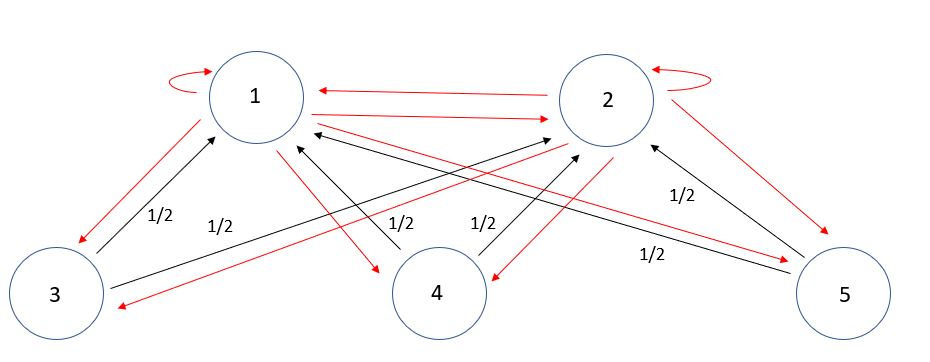

The table below shows all the transition probabilities, for example node 1 to any other node (including itself) is 0.2. Node 3 to nodes 1 or 2 has a probability of 0.5 but into any other nodes (including itself) it is 0. 

In [55]:
matrix = np.array([[0.2,0.2,0.2,0.2,0.2],
                   [0.2,0.2,0.2,0.2,0.2],
                   [0.5,0.5,0,0,0],
                   [0.5,0.5,0,0,0],
                   [0.5,0.5,0,0,0]])
trans_probs = pd.DataFrame(matrix, columns=[1,2,3,4,5],index=[1,2,3,4,5])
trans_probs

,1,2,3,4,5
1,0.2,0.2,0.2,0.2,0.2
2,0.2,0.2,0.2,0.2,0.2
3,0.5,0.5,0.0,0.0,0.0
4,0.5,0.5,0.0,0.0,0.0
5,0.5,0.5,0.0,0.0,0.0


## Q3.C:

The pagerank equations are as follows: 

$\pi(1) = \alpha/n + (1-\alpha)\cdot(\pi(3)/2+\pi(4)/2+\pi(5)/2)$

$\pi(2) = \alpha/n + (1-\alpha)\cdot(\pi(3)/2+\pi(4)/2+\pi(5)/2)$

$\pi(3) = \alpha/n + (1-\alpha)\cdot(\pi(1)/5+\pi(2)/5)$

$\pi(4) = \alpha/n + (1-\alpha)\cdot(\pi(1)/5+\pi(2)/5)$

$\pi(5) = \alpha/n + (1-\alpha)\cdot(\pi(1)/5+\pi(2)/5)$